In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df=pd.read_csv(r'C:\Users\Ulum\Downloads\bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [82]:
df.groupby(['year'])['price'].mean().reset_index()[['year','price']].tail()

,year,price
20,2016,16638.403826
21,2017,19267.174898
22,2018,22721.656840
23,2019,31025.864275
24,2020,35377.680764


<Axes: xlabel='year'>

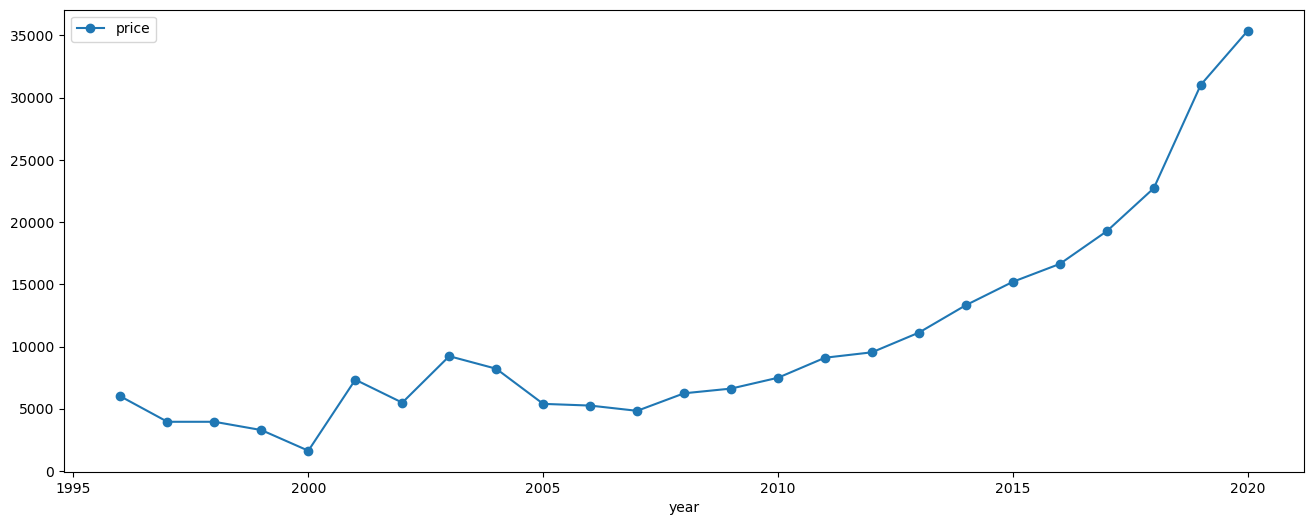

In [83]:
df.groupby(['year'])['price'].mean().reset_index()[['year','price']].plot(x='year', y='price',marker='o',figsize=(16,6))

In [84]:
df.groupby(['model'])['price'].mean().reset_index()[['model','price']].head()

,model,price
0,1 Series,15821.670391
1,2 Series,19539.371847
2,3 Series,19880.857962
3,4 Series,22498.418090
4,5 Series,22537.428030


<Axes: xlabel='price', ylabel='model'>

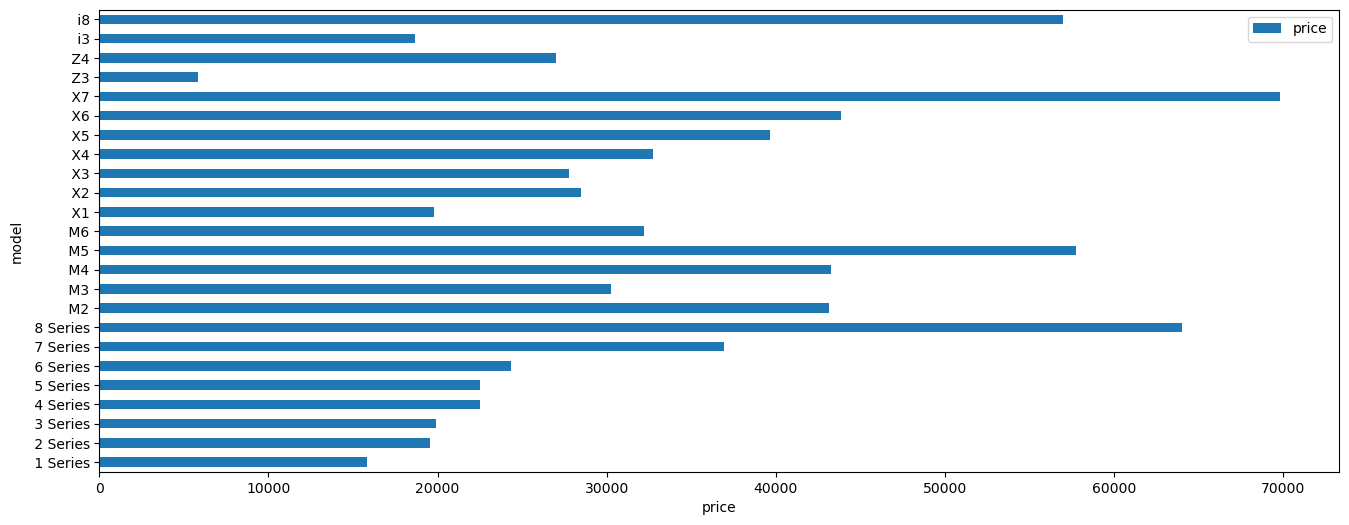

In [85]:
df.groupby(['model'])['price'].mean().reset_index()[['model','price']].plot(x='model', y='price',xlabel='price', figsize=(16,6), kind='barh')

<Axes: xlabel='year', ylabel='model'>

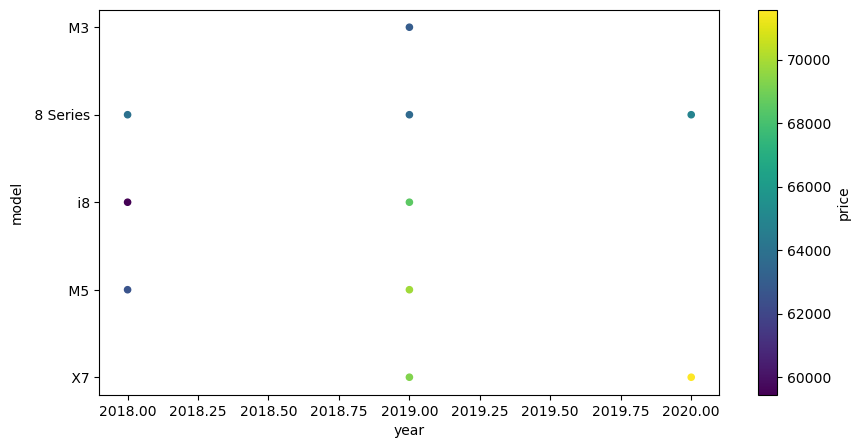

In [86]:
df.groupby(['model','year'])['price'].mean().reset_index()[['model','year','price']].sort_values('price',ascending=False).head(10).plot(x='year',y='model', c='price',kind='scatter', figsize=(10,5))

<Axes: xlabel='transmission'>

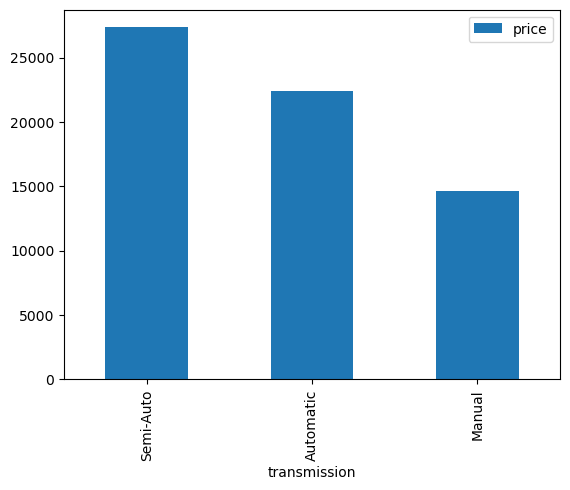

In [87]:
df.groupby('transmission')['price'].mean().reset_index()[['transmission','price']].sort_values('price', ascending=False).plot(x='transmission', y='price', kind='bar')

In [88]:
df['Age'] = 2020-df['year']

In [97]:
df['Avg_mileage_per_year']=df['mileage']/df['Age']
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age,Avg_mileage,Avg_mileage_per_year
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,6,11178.000000,11178.000000
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,2,7413.500000,7413.500000
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,4,15698.500000,15698.500000
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,3,8892.000000,8892.000000
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,6,6592.333333,6592.333333


In [99]:
df.drop('Avg_mileage', axis=1, inplace=True)

In [100]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age,Avg_mileage_per_year
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,6,11178.000000
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,2,7413.500000
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,4,15698.500000
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,3,8892.000000
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,6,6592.333333


In [102]:
a=[]
for row in df['Avg_mileage_per_year']:
    if row < 3106:
        a.append('Low mileage')
    elif row < 6213:
        a.append('Normal mileage')
    else :
        a.append('High mileage')
df['Mileage_class'] = a   

In [103]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age,Avg_mileage_per_year,Mileage_class
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,6,11178.000000,High mileage
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,2,7413.500000,High mileage
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,4,15698.500000,High mileage
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,3,8892.000000,High mileage
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,6,6592.333333,High mileage


<Axes: xlabel='Mileage_class'>

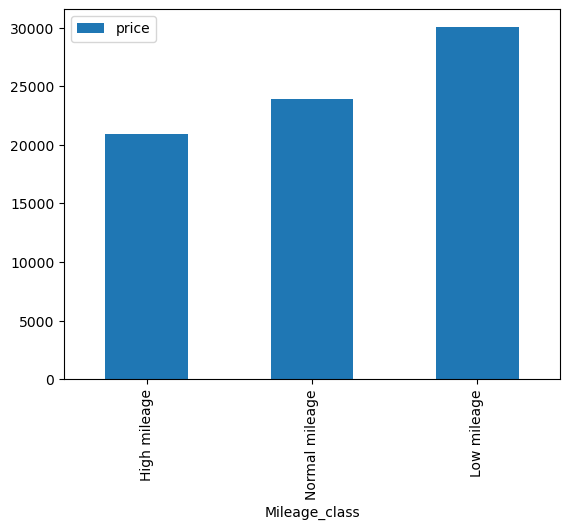

In [111]:
df.groupby('Mileage_class')['price'].mean().reset_index()[['Mileage_class','price']].sort_values('price').plot(x='Mileage_class',y='price',kind='bar')

<Axes: xlabel='price', ylabel='fuelType'>

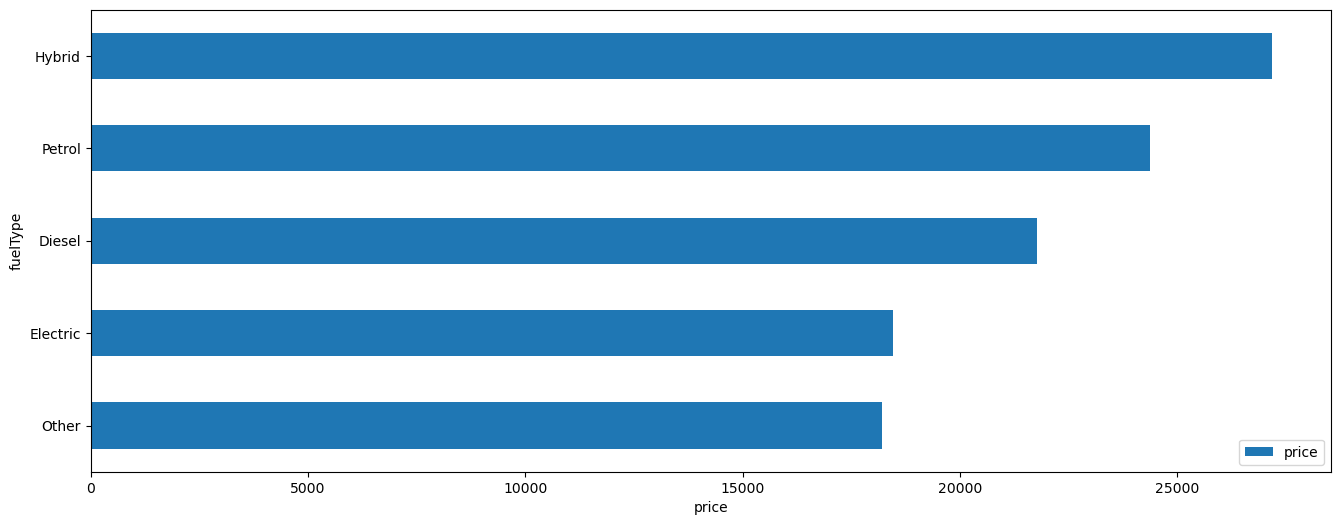

In [120]:
df.groupby('fuelType')['price'].mean().reset_index()[['fuelType','price']].sort_values('price').plot(x='fuelType', y='price',xlabel='price', figsize=(16,6), kind='barh')

In [125]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age,Avg_mileage_per_year,Mileage_class
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,6,11178.000000,High mileage
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,2,7413.500000,High mileage
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,4,15698.500000,High mileage
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,3,8892.000000,High mileage
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,6,6592.333333,High mileage


In [126]:
mpg=[]
for row in df['mpg']:
    if row < 20:
        mpg.append('poor')
    elif row <30 :
        mpg.append('fair')
    elif row < 40 :
        mpg.append('good')
    else :
        mpg.append('excelent')

In [127]:
df['Mileage_rating_scale']=mpg
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age,Avg_mileage_per_year,Mileage_class,Mileage_rating_scale
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,6,11178.000000,High mileage,excelent
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,2,7413.500000,High mileage,excelent
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,4,15698.500000,High mileage,excelent
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,3,8892.000000,High mileage,excelent
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,6,6592.333333,High mileage,excelent


<Axes: xlabel='price'>

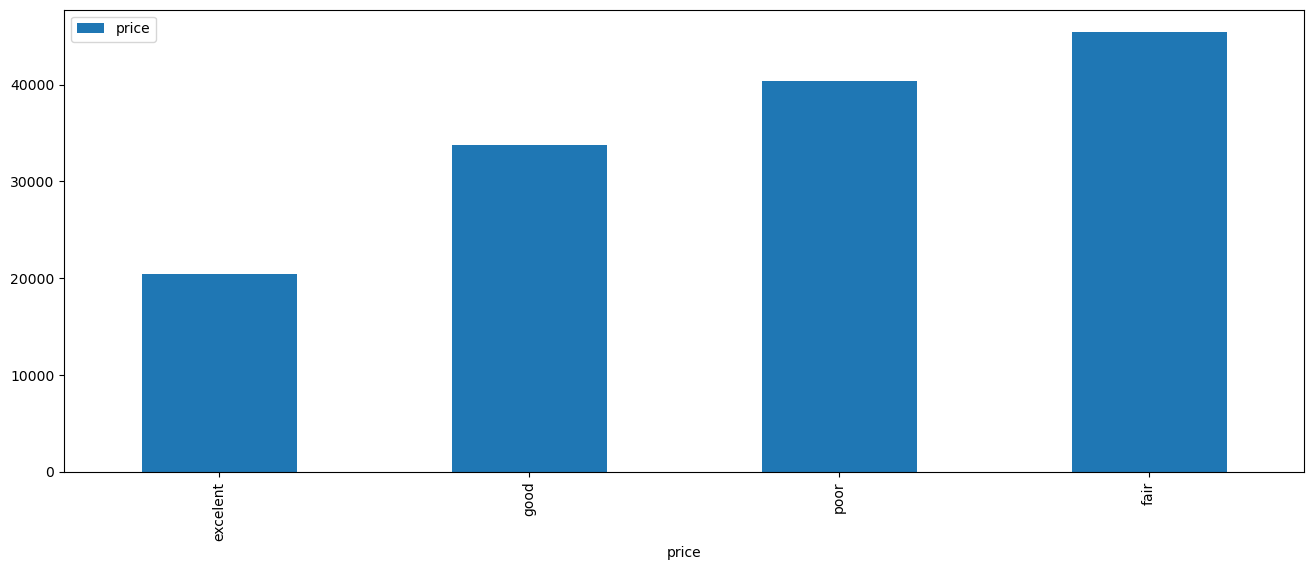

In [133]:
df.groupby('Mileage_rating_scale')['price'].mean().reset_index()[['Mileage_rating_scale','price']].sort_values('price').plot(x='Mileage_rating_scale', y='price',xlabel='price', figsize=(16,6), kind='bar')

In [129]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age,Avg_mileage_per_year,Mileage_class,Mileage_rating_scale
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,6,11178.000000,High mileage,excelent
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,2,7413.500000,High mileage,excelent
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,4,15698.500000,High mileage,excelent
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,3,8892.000000,High mileage,excelent
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,6,6592.333333,High mileage,excelent


<Axes: ylabel='engineSize'>

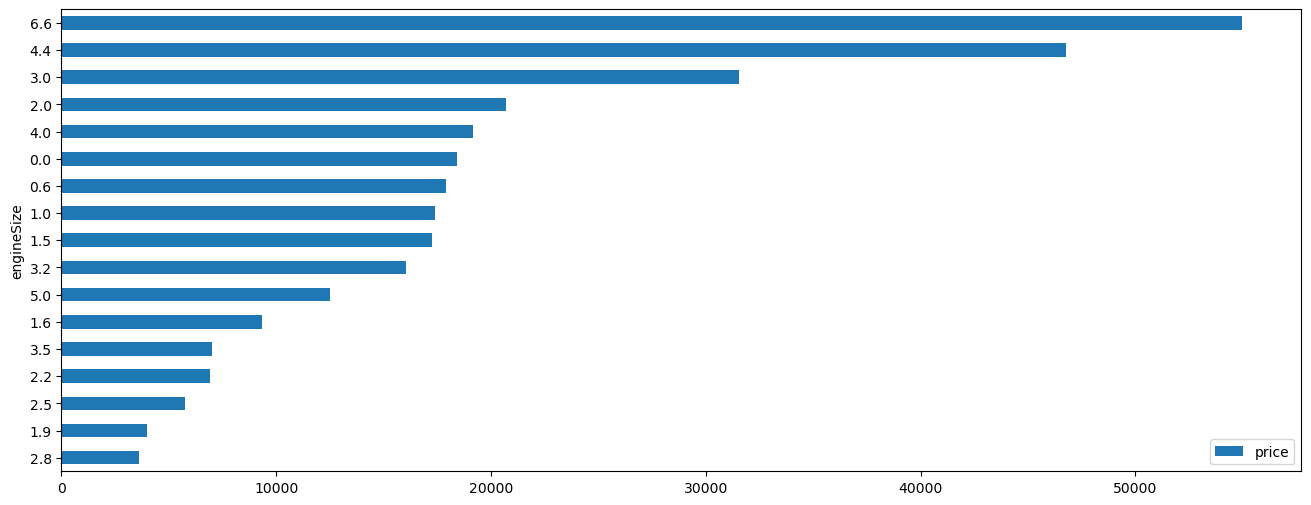

In [132]:
df.groupby('engineSize')['price'].mean().reset_index()[['engineSize','price']].sort_values('price').plot(x='engineSize', y='price',kind='barh',figsize=(16,6))